In [ ]:





import pandas as pd

batch_size = 1000

# Create an iterator for the CSV file
csv_iterator = pd.read_csv('/content/drive/MyDrive/output.csv', chunksize=batch_size)

# Initialize an empty DataFrame
dataset = pd.DataFrame()

# Iterate over the iterator to read the file in batches
for batch in csv_iterator:
    # Concatenate the batch with the main DataFrame
    dataset = pd.concat([dataset, batch])

# Print the first 5 rows of the DataFrame
print(dataset.head())

   Unnamed: 0    0    1    2    3    4    5    6    7    8  ...  16376  16377  \
0           0   83  132  158  120   99   69   55   55   47  ...    213    209   
1           1   41   53   51   64  136  205  146   35   43  ...    197    221   
2           2  249  249  248  247  246  246  247  248  249  ...    248    248   
3           3  136  139  190  250  252  185  149  153  122  ...    206    210   
4           4  248  248  248  248  248  248  248  248  248  ...    247    247   

   16378  16379  16380  16381  16382  16383  \
0    198    216    189    121     82     90   
1    186    145    197    204    200    210   
2    248    248    248    248    246    246   
3    203    187    197    220    211    191   
4    247    247    247    247    247    247   

                                         id  label  
0  b7c674519578f8177928734ee099851e797a7440      0  
1  f6e72bccfd0d5b142206481f65c6b2153f857403      0  
2  1883398b671745dc26afa881f43746bc2e7e7e98      0  
3  d782b2c66461257

In [ ]:
dataset.shape
dataset = dataset.drop(columns=dataset.columns[0], axis=1)

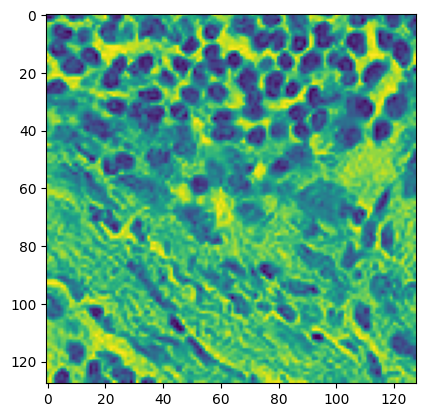

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

ids = dataset['id']
labels = dataset['label']

X = dataset.drop(['id', 'label'], axis=1)
y= labels

pixel_values =X.iloc[1,:16384].values

image_size = 128
image = pixel_values.reshape((image_size, image_size))

# Display the image
plt.imshow(image)
plt.show()

In [ ]:
batch_size = 1000

for i in range(0, len(dataset), batch_size):
    # Select a batch of images
    batch = dataset.iloc[i:i+batch_size, :16384]

    # Convert the pixel values of the images to black and white
    batch.iloc[:, :16384] = np.where(batch.iloc[:, :16384] > 127, 1, 0)

    # Update the original dataset with the new pixel values
    dataset.iloc[i:i+batch_size, :16384] = batch.iloc[:, :16384]




(16384,)
[0 0 0 ... 0 0 0]


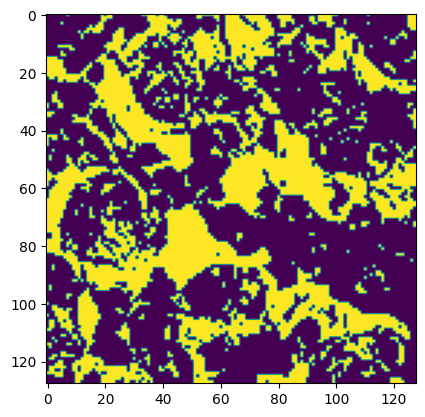

(16384,)
[0 1 1 ... 1 1 1]


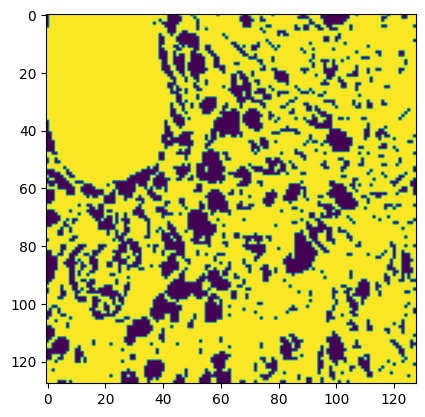

(16384,)
[1 1 1 ... 1 1 1]


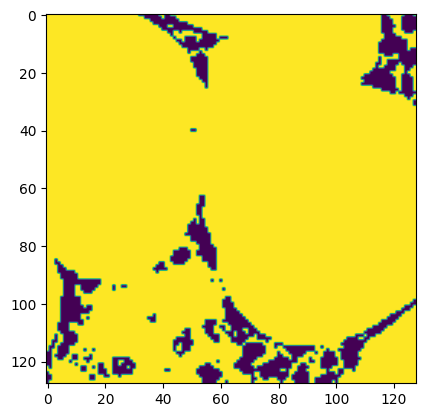

(16384,)
[0 1 1 ... 0 0 0]


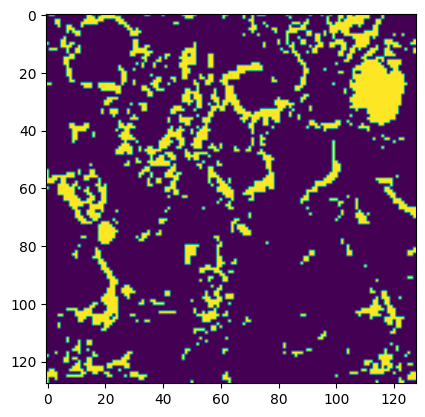

(16384,)
[0 0 0 ... 1 1 1]


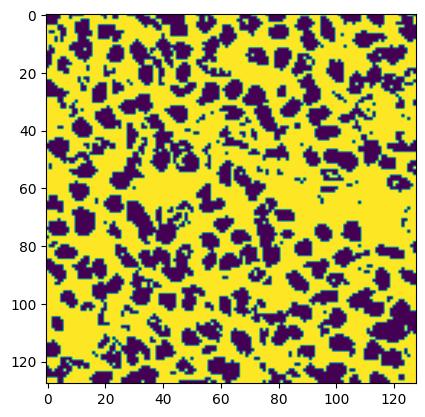

(16384,)
[0 0 0 ... 1 1 1]


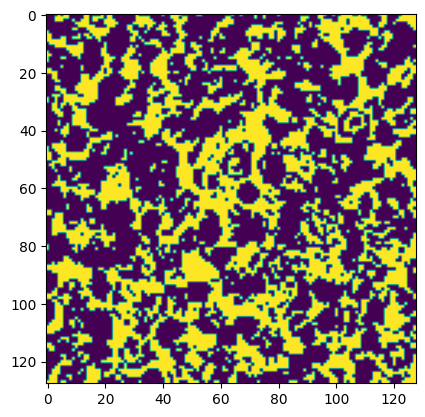

(16384,)
[1 1 1 ... 0 0 0]


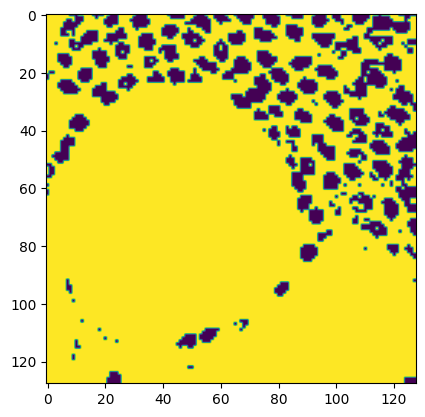

(16384,)
[1 1 1 ... 1 1 1]


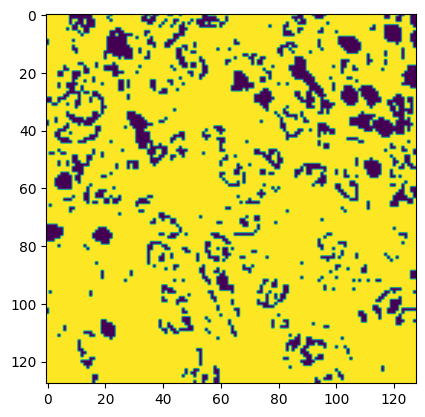

(16384,)
[0 0 0 ... 1 1 1]


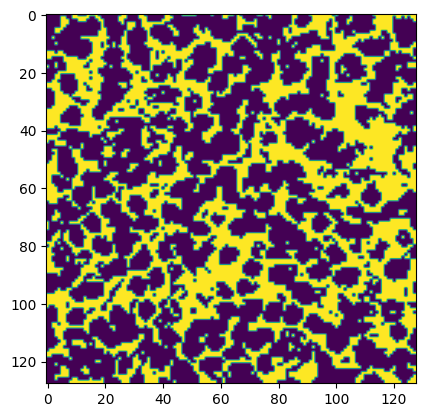

(16384,)
[1 1 1 ... 1 1 1]


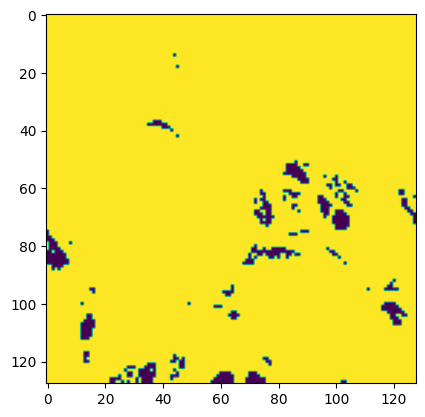

In [ ]:
# Display the first image after the conversion
for i in range(10):
  pixel_values = dataset.iloc[i+15000, 0:16384].values
  print(pixel_values.shape)
  print(pixel_values)
  image_size = 128
  image = pixel_values.reshape((image_size, image_size))
  image= image.astype('float')
  plt.imshow(image)
  plt.show()

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [ ]:
X = dataset.drop(['id', 'label'], axis=1).to_numpy()
y= dataset['label'].to_numpy()



In [ ]:
batch_size = 1000
num_batches = 20
pca = PCA(n_components=500)
X_pca = np.empty((0, 500))
for i in range(num_batches):
    X_batch = X[i * batch_size:(i + 1) * batch_size, :]
    X_pca_batch = pca.fit_transform(X_batch)
    X_pca = np.concatenate((X_pca, X_pca_batch), axis=0)

print(f"Reduced dataset shape: {X_pca.shape}")  # (20000, 500)


Reduced dataset shape: (20000, 500)


In [ ]:
batch_size = 1000
num_batches = 20
pca = PCA(n_components=2)
X_pca1 = np.empty((0, 2))
for i in range(num_batches):
    X_batch = X[i * batch_size:(i + 1) * batch_size, :]
    X_pca_batch = pca.fit_transform(X_batch)
    X_pca1 = np.concatenate((X_pca1, X_pca_batch), axis=0)

print(f"Reduced dataset shape: {X_pca1.shape}")

Reduced dataset shape: (20000, 2)


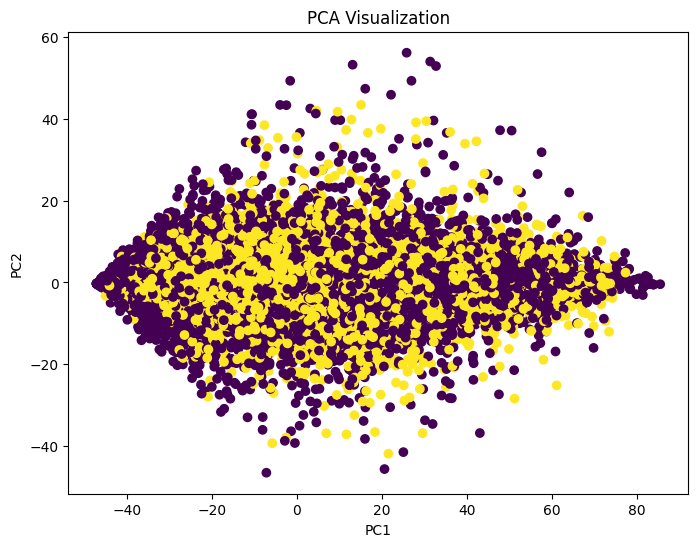

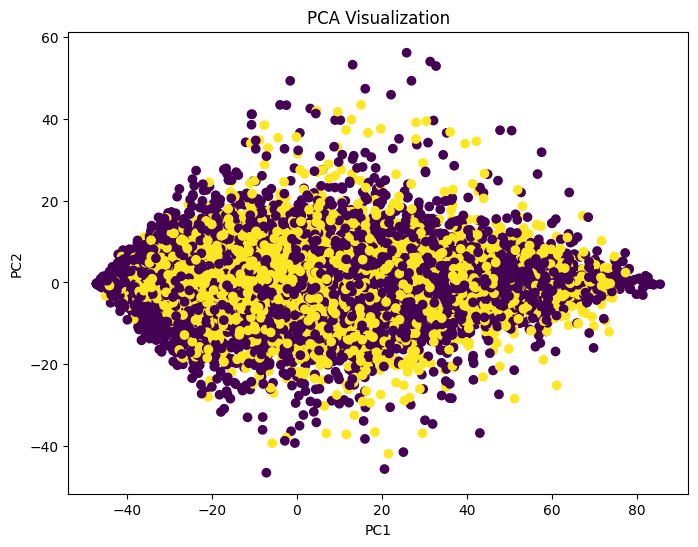

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y[0:20000])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y[0:20000])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = np.empty((0, 1))
for i in range(num_batches):
    X_pca_batch = X_pca[i * batch_size:(i + 1) * batch_size, :]
    y_batch = y[i * batch_size:(i + 1) * batch_size]
    X_lda_batch = lda.fit_transform(X_pca_batch, y_batch)
    X_lda = np.concatenate((X_lda, X_lda_batch), axis=0)



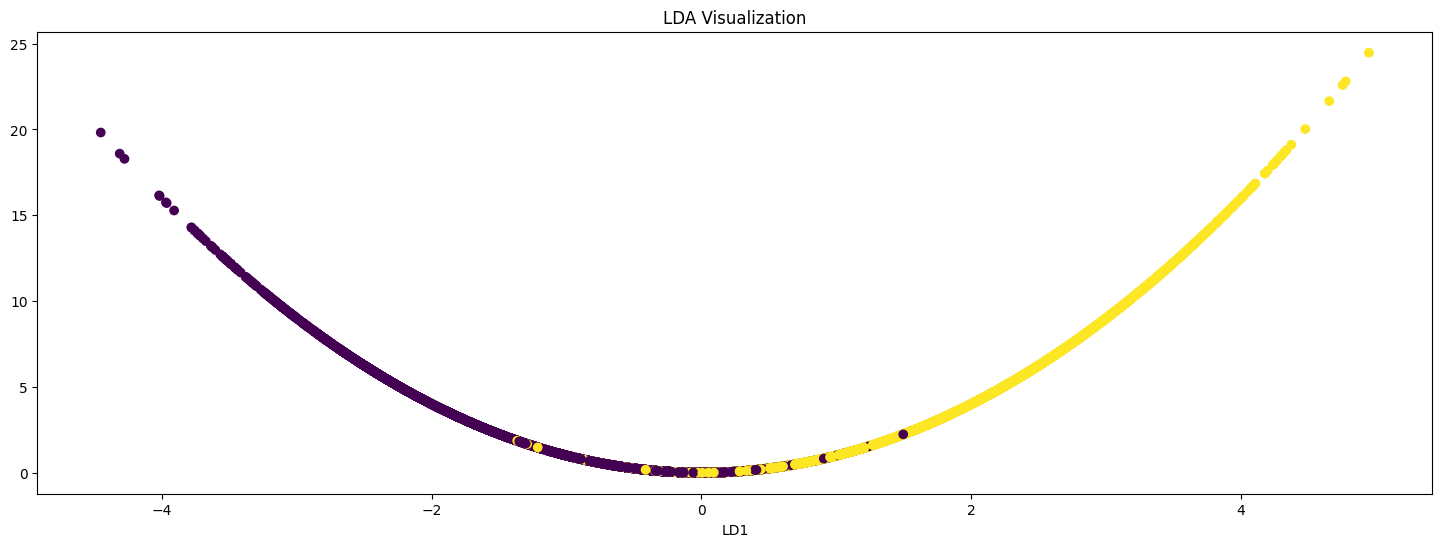

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(X_lda[:, 0], X_lda[:,0]**2, c=y[0:20000])
plt.xlabel('LD1')
plt.title('LDA Visualization')
plt.show()

In [ ]:
X_lda[:,0].shape

(20000,)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_lda)
y_pred = kmeans.predict(X_lda)
accuracy = np.sum(y_pred == y[0:20000]) / len(y[0:20000])
print(f"Accuracy of LDA model: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of LDA model: 0.8664


In [ ]:
from sklearn.manifold import TSNE

n_components = 2
perplexity = 30

# Initialize the t-SNE model
tsne = TSNE(n_components=n_components, perplexity=perplexity)

# Process the dataset in batches to save memory
batch_size = 1000
n_samples = X.shape[0]
n_batches = int(np.ceil(n_samples/batch_size))

X_tsne = []
for i in range(n_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, n_samples)
    X_batch = X[start:end,:]
    X_tsne_batch = tsne.fit_transform(X_batch)
    X_tsne.append(X_tsne_batch)
X_tsne = np.vstack(X_tsne)

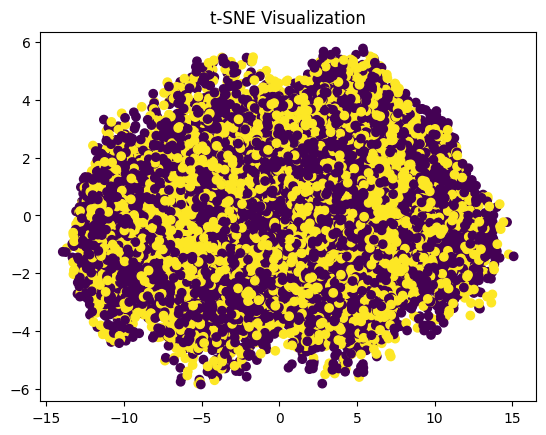

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
plt.title('t-SNE Visualization')
plt.show()

In [ ]:
X_pca.shape[0]

20000

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = np.zeros(X_pca.shape[0])
_ = agg.fit(X_pca)
agg_labels = agg.labels_


In [ ]:
# Evaluate clustering performance
n_correct = np.sum(agg_labels == y[0:20000])
accuracy = n_correct / y[0:20000].shape[0]
print(f"Agglomerative clustering accuracy: {accuracy:.3f}")

Agglomerative clustering accuracy: 0.502




 label    1
Name: 15000, dtype: object


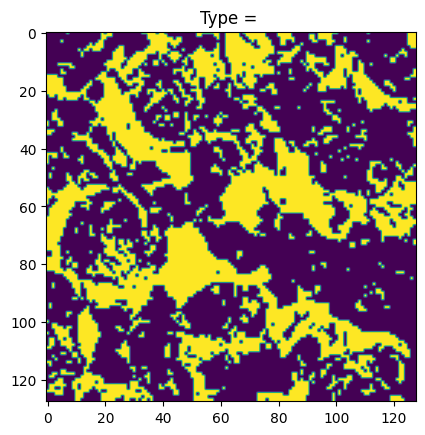



 label    1
Name: 15001, dtype: object


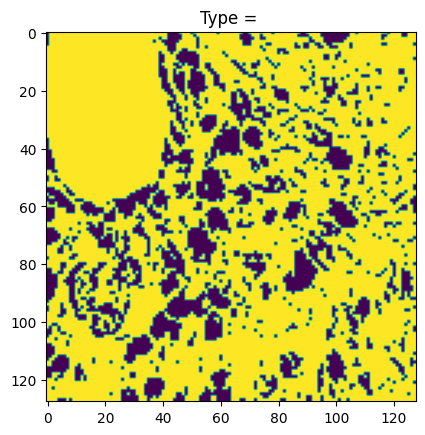



 label    0
Name: 15002, dtype: object


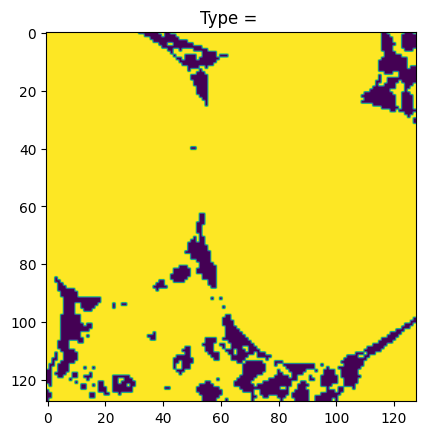



 label    1
Name: 15003, dtype: object


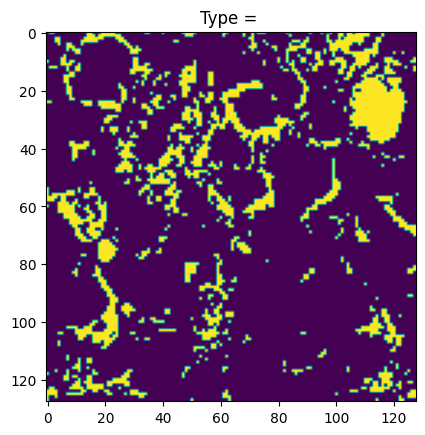



 label    0
Name: 15004, dtype: object


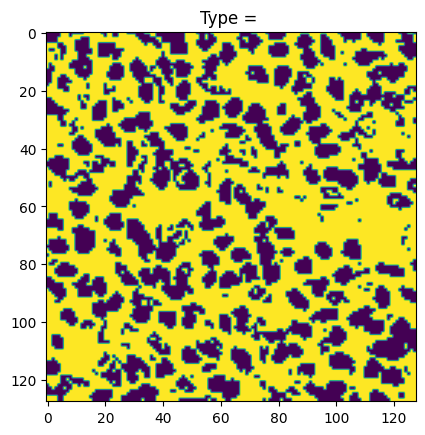



 label    0
Name: 15005, dtype: object


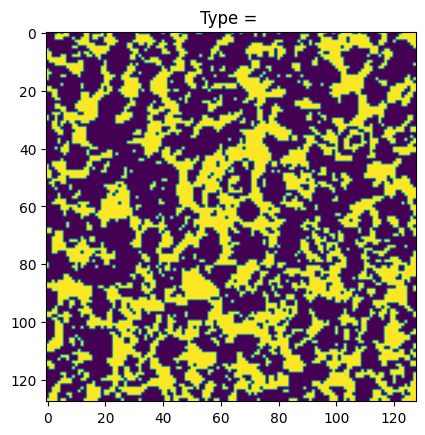



 label    0
Name: 15006, dtype: object


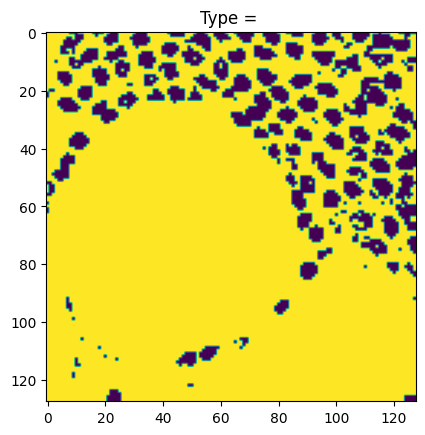



 label    1
Name: 15007, dtype: object


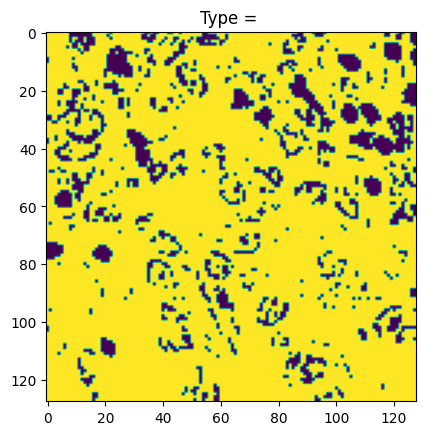



 label    0
Name: 15008, dtype: object


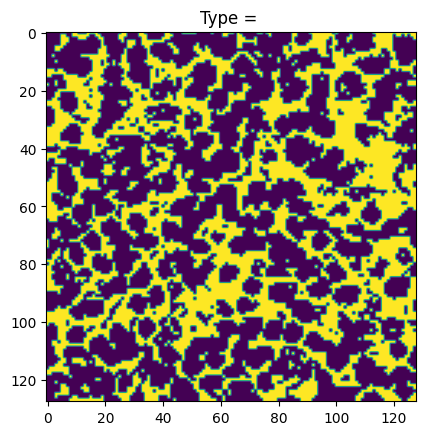



 label    1
Name: 15009, dtype: object


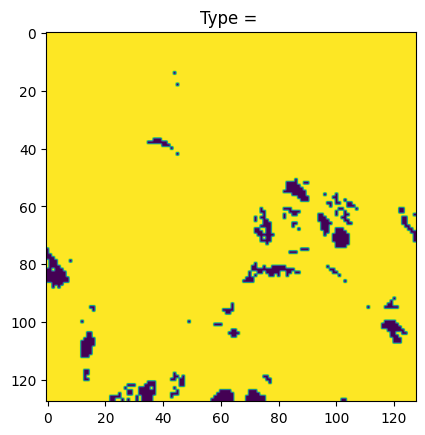

In [ ]:
for i in range(10):
  pixel_values = dataset.iloc[i+15000, 0:16384].values
  image_size = 128
  image = pixel_values.reshape((image_size, image_size))
  image= image.astype('float')
  a = dataset.iloc[i+15000, 16385:]
  print('\n\n',a)
  plt.title("Type = ",a)
  plt.imshow(image)
  plt.show()